# Prediction of Fuel Efficiency (Miles Per Gallon) of Car
#By Shwetabh Kumar Gupta Data Science Batch (DF-1909)

In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(font_scale=2)
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use("classic")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [4]:
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model_year', 'origin', 'car_name']
df1 = pd.read_table('auto-mpg.data-original', delim_whitespace=True, names=names)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


# Data cleaning

In [3]:
#null value check
print(len(df1)-df1.count()) #column wise shows the presence of nan value
print(len(df1)-len(df1.dropna())) #gives number of rows contating nan

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64
14


In [4]:
df1[df1.isnull().any(axis=1)] #showing columns with nans

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe


In [5]:
#Removing nan's
df1=df1.dropna()


In [6]:
df1[df1.isnull().any(axis=1)] #checked to see if nan's removed.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name


In [7]:
print(df1.describe())
print(df1.shape)

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [8]:
# summary of object features
df1.describe(include=["O"])

,car_name
count,392
unique,301
top,amc matador
freq,5


# Exploratory Data Analysis

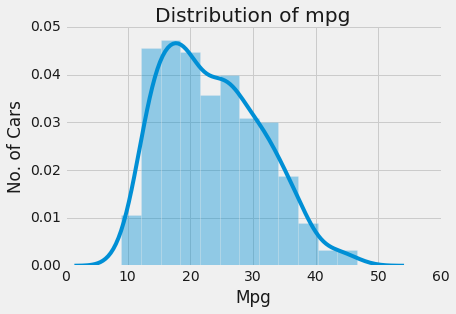

In [9]:
#Visualize target variable mpg
plt.style.use("fivethirtyeight")
sns.distplot(df1["mpg"])
plt.xlabel("Mpg")
plt.ylabel("No. of Cars")
plt.title("Distribution of mpg")
sns.despine()

#Looks like a little skewed towards left, we try to bring it closer to normal by applying box cox transformation

0.00013592593313660473

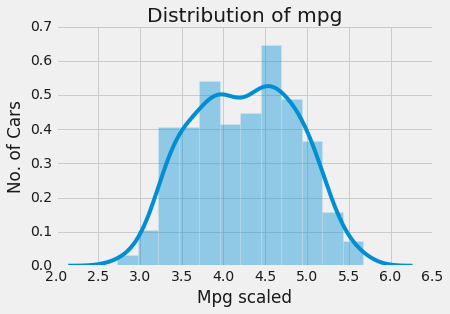

In [10]:
z=stats.boxcox(df1['mpg'])[0]
plt.style.use("fivethirtyeight")
sns.distplot(z)
plt.xlabel("Mpg scaled")
plt.ylabel("No. of Cars")
plt.title("Distribution of mpg")
sns.despine()
stats.boxcox(df1['mpg'])[1]
stats.shapiro(z)[1]

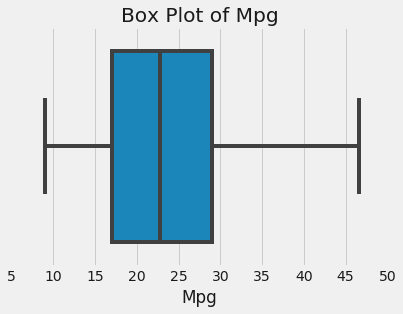

In [11]:
#Checking for outliers in the mpg
sns.boxplot(df1["mpg"])
plt.xlabel("Mpg")
plt.title("Box Plot of Mpg")
plt.show()

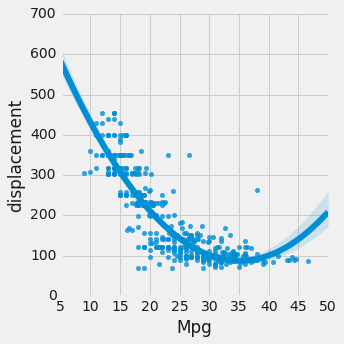

In [12]:
#Make individual plots to see how response depends on predictors
sns.lmplot("mpg","displacement",df1,order=2)
plt.xlabel("Mpg")
plt.ylabel("displacement")
sns.despine()


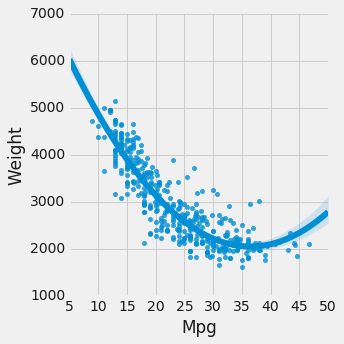

In [13]:
sns.lmplot("mpg","weight",df1,order=2)
plt.xlabel("Mpg")
plt.ylabel("Weight")
sns.despine()

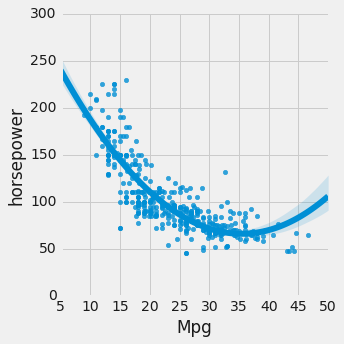

In [14]:

sns.lmplot("mpg","horsepower",df1,order=2)
plt.xlabel("Mpg")
plt.ylabel("horsepower")
sns.despine()

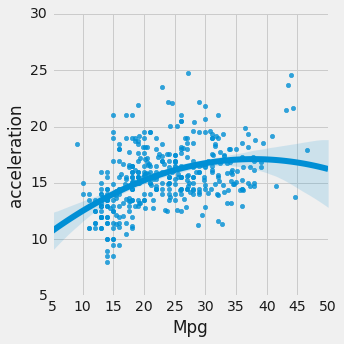

In [15]:
sns.lmplot("mpg","acceleration",df1,order=2)
plt.xlabel("Mpg")
plt.ylabel("acceleration")
sns.despine()

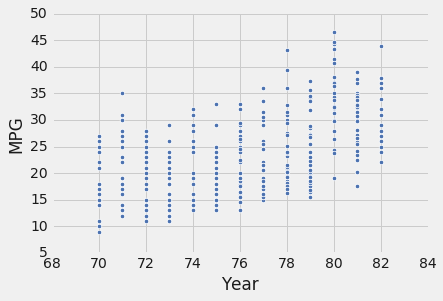

In [16]:
sns.scatterplot(df1["model_year"], df1["mpg"])
plt.xlabel("Year")
plt.ylabel("MPG")
sns.despine()

#There seems to be some inverse relation between mpg pairs with horsepower,weight and displacement and the plots show that a relationship exist between the input features acceleration and year and the target mpg. mpg seems to incrase linearly with these feature.

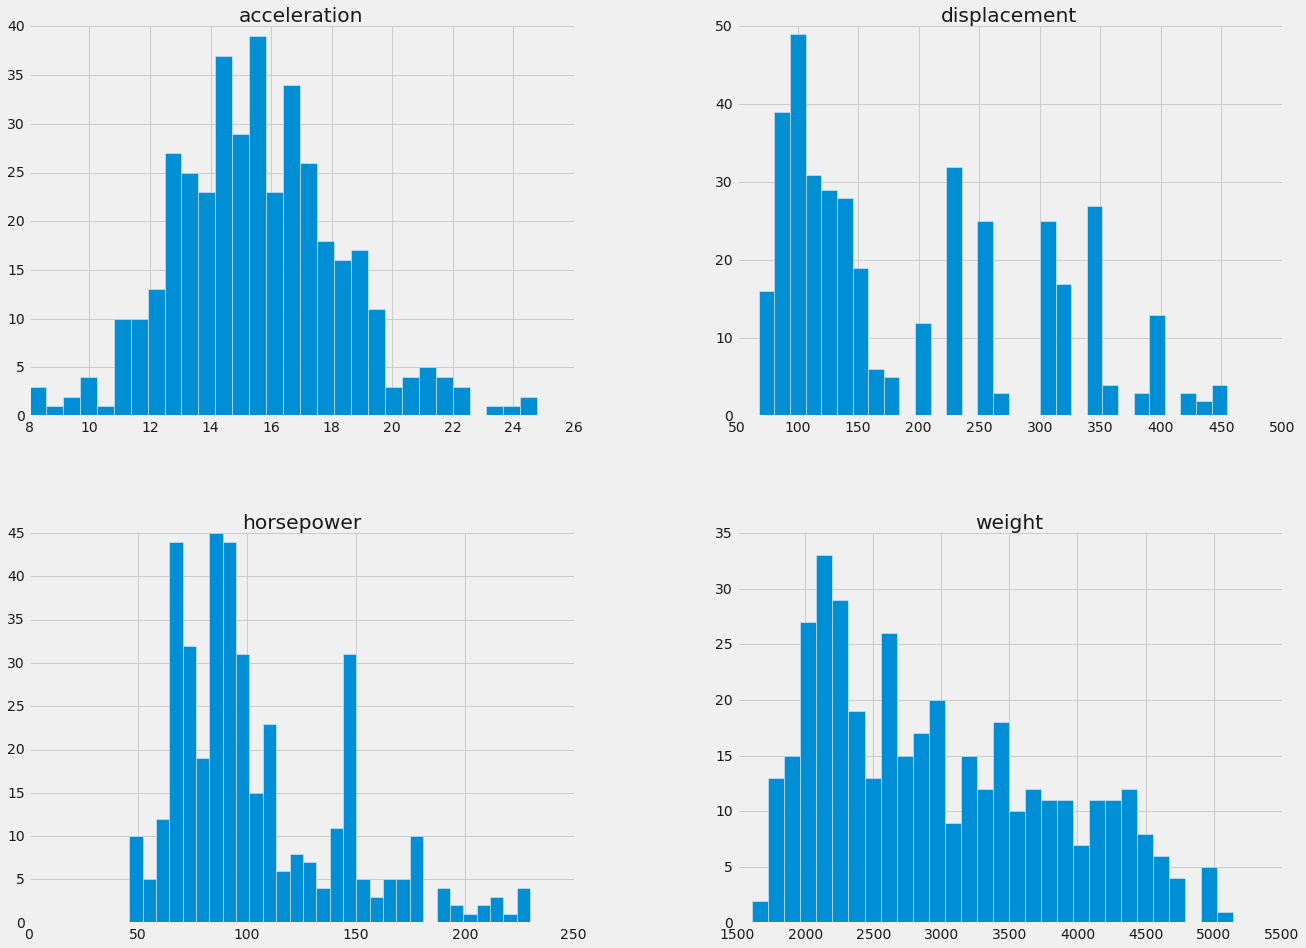

In [17]:
#Distribution of Continuous Features
cont_features = ["displacement", "horsepower", "weight", "acceleration"]
df1[cont_features].hist(bins=30, figsize=(20, 15))
sns.despine()

#Some histograms are tail heavy which can make it harder for some Machine Learning algorithms to detect patterns. It can be usefull to transform these features to make them more normally distributed.
Continuous features are distributed on the same scale.
However, the scale differs from the multi-valued discrete feature cylinders (3-8). Depending on the algorithm, further scaling might be needed

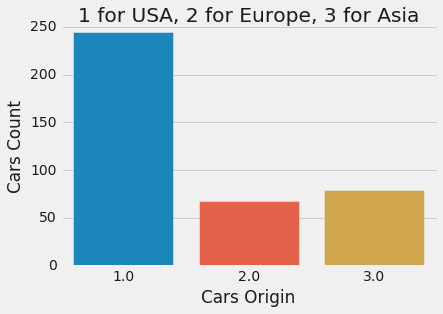

In [18]:
#Distribution of Categorical Features

sns.countplot(df1.origin)
plt.ylabel("Cars Count")
plt.xlabel("Cars Origin")
plt.title("1 for USA, 2 for Europe, 3 for Asia")
sns.despine()

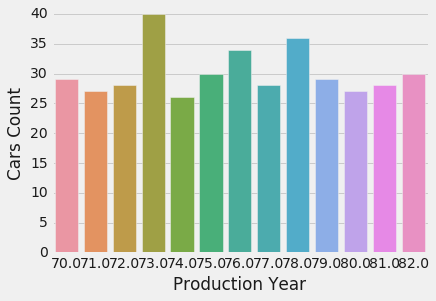

In [19]:
sns.countplot(df1.model_year)
plt.ylabel("Cars Count")
plt.xlabel("Production Year")
sns.despine()

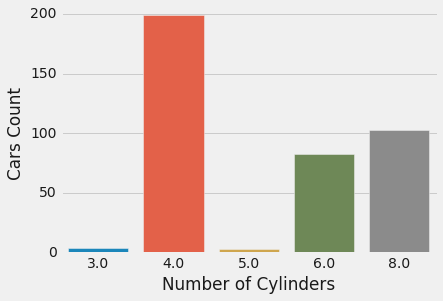

In [20]:
sns.countplot(df1.cylinders)
plt.xlabel("Number of Cylinders")
plt.ylabel("Cars Count")
sns.despine()

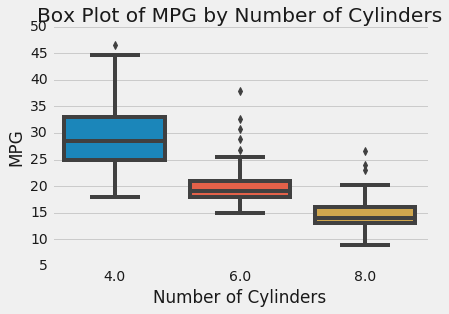

In [21]:
df1_cylinders = df1[~df1["cylinders"].isin([3, 5])]
sns.boxplot(x="cylinders", y="mpg", data=df1_cylinders)
plt.xlabel("Number of Cylinders")
plt.ylabel("MPG")
plt.title("Box Plot of MPG by Number of Cylinders")
sns.despine()

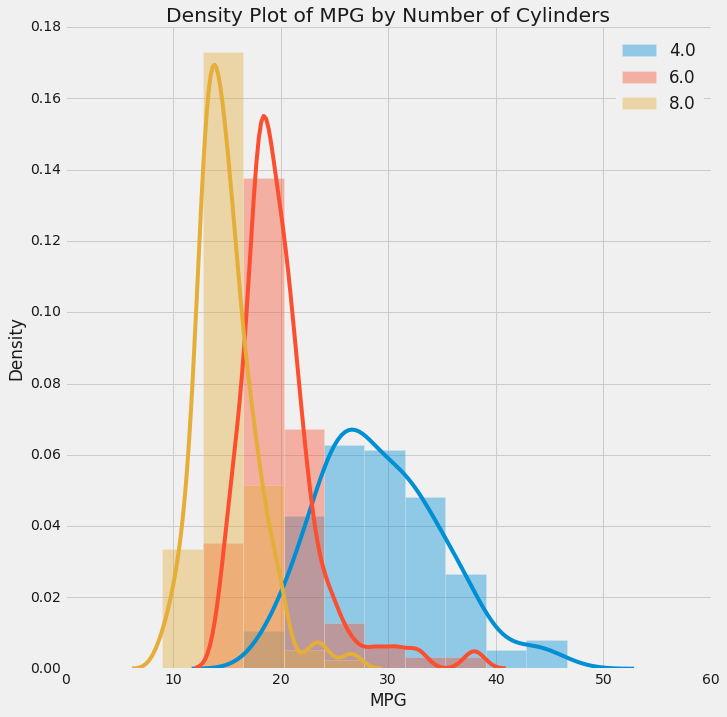

In [22]:
_, bins = np.histogram(df1_cylinders["mpg"])
g = sns.FacetGrid(df1_cylinders, hue="cylinders", height=10)
g = g.map(sns.distplot, "mpg", bins=bins)
plt.ylabel("Density")
plt.xlabel("MPG")
plt.title("Density Plot of MPG by Number of Cylinders")
plt.legend()
plt.show()

The plots show that a relationship exist between the input features acceleration and year and the target mpg. mpg seems to incrase linearly with these feature.

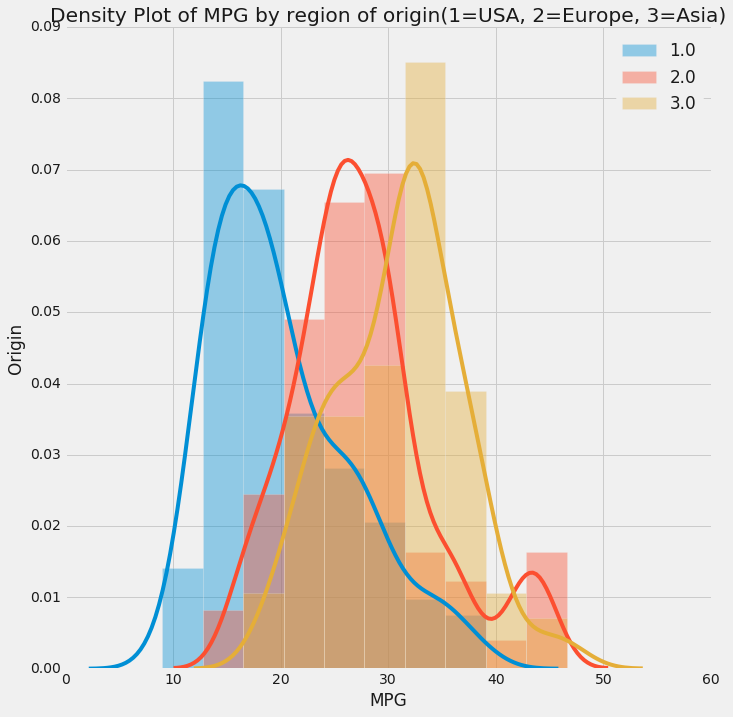

In [23]:

_, bins = np.histogram(df1_cylinders["mpg"])
g = sns.FacetGrid(df1_cylinders, hue="origin", height=10)
g = g.map(sns.distplot, "mpg", bins=bins)
plt.ylabel("Origin")
plt.xlabel("MPG")
plt.title("Density Plot of MPG by region of origin(1=USA, 2=Europe, 3=Asia)")
plt.legend()
plt.show()

#The desity plot shows that a car made in Asia has a higher mgp then a car made in Europe on an average. A car made in Europe has a higher mpg that a car made in USA on avergae.

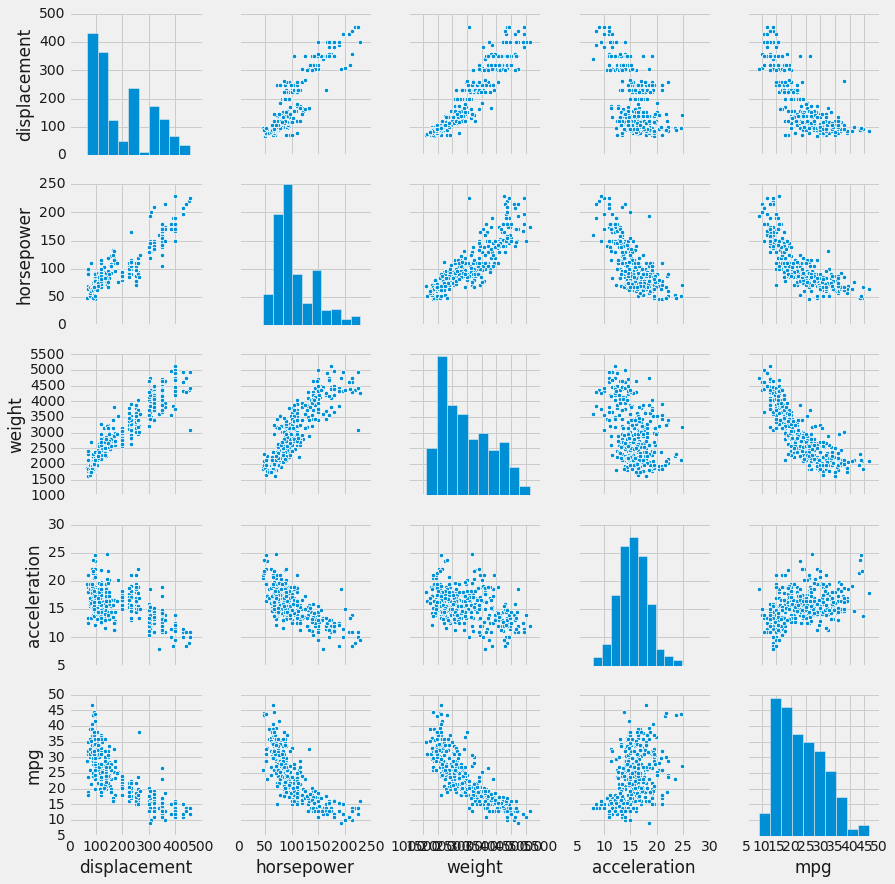

In [24]:
#Checking feature Collinearity
continous = ["displacement", "horsepower", "weight", "acceleration", "mpg"]

sns.pairplot(df1[continous].dropna())
plt.show()

In [25]:
#Checking for Pearson correlation
df1[continous].corr()

,displacement,horsepower,weight,acceleration,mpg
displacement,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.423329
mpg,-0.805127,-0.778427,-0.832244,0.423329,1.000000


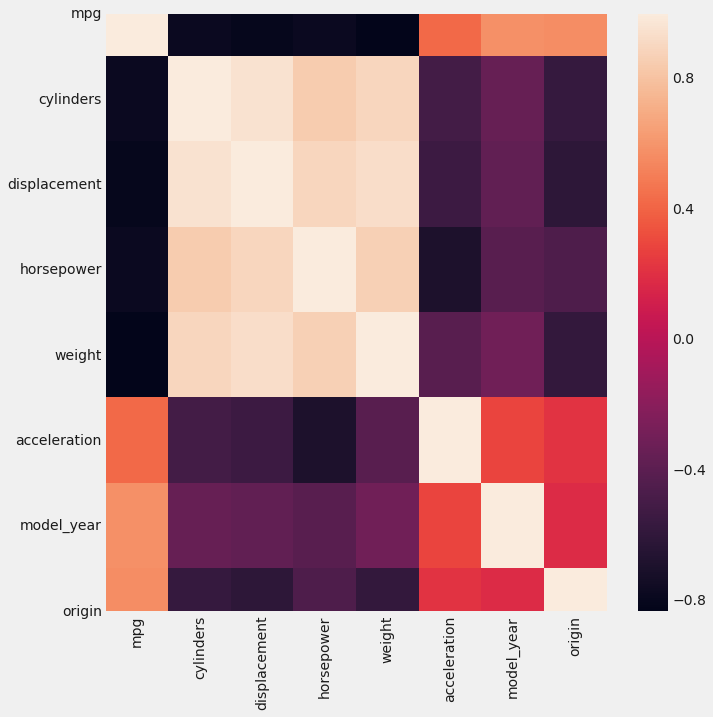

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr())

#cylinders, displacement and weight are highly correlated, mpg is highly correlated to these three features as well.

# Feature Engineering and Selection


In [27]:
# make a copy of df instead of overwriting it
col_kept = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df2 = df1[col_kept].copy()
df2.head(8)

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5
5,15.0,429.0,198.0,4341.0,10.0
6,14.0,454.0,220.0,4354.0,9.0
7,14.0,440.0,215.0,4312.0,8.5


In [28]:
# create 'inverse' columns and add transformed response column
for col in df2.columns[1:4]:
    df2.loc[:, 'inv_'+col] = 1. / df2.loc[:, col]
df2.loc[:, 'boxcox_mpg'] = z
df2.head(3)

,mpg,displacement,horsepower,weight,acceleration,inv_displacement,inv_horsepower,inv_weight,boxcox_mpg
0,18.0,307.0,130.0,3504.0,12.0,0.003257,0.007692,0.000285,3.859148
1,15.0,350.0,165.0,3693.0,11.5,0.002857,0.006061,0.000271,3.547736
2,18.0,318.0,150.0,3436.0,11.0,0.003145,0.006667,0.000291,3.859148


# Modelling


# 1. Linear Regression

In [29]:
#Split data into train/test sets and find mean/variance of train set for scaling

feature = ['inv_displacement', 'inv_horsepower', 'inv_weight','acceleration']
response1=['mpg']
X_train, X_test, y_train, y_test = train_test_split(df2[feature], df2[response1], test_size=0.3, random_state=10)

In [30]:
regressor = LinearRegression()
regressor.get_params()
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
a=rmse
print("Rmse",rmse)
print("r^2=",regressor.score(X_test, y_test))

Rmse 3.717009309941545
r^2= 0.7559701022328772


# 2. RidgeCV with PolynomialFeatures

In [31]:
#Split data into train/test sets and find mean/variance of train set for scaling

feature = ['inv_displacement', 'inv_horsepower', 'inv_weight','acceleration']
response = ['boxcox_mpg']

X_train, X_test, y_train, y_test = train_test_split(df2[feature], df2[response], test_size=0.3, random_state=10)


In [32]:
scalerX = preprocessing.StandardScaler().fit(X_train)
scalery = preprocessing.StandardScaler().fit(y_train)

X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)
y_train_scaled = scalery.transform(y_train)
y_test_scaled = scalery.transform(y_test)

In [33]:
# Use RidgeCV with PolynomialFeatures
alphas = np.logspace(0,2,10)

model = make_pipeline(preprocessing.PolynomialFeatures(4, interaction_only=True), \
                      RidgeCV(alphas=alphas))

In [34]:
# fit model and score it based on r^2 and rmse
model.fit(X_train_scaled, y_train_scaled);
y_pred_scaled = model.predict(X_test_scaled)
print('r^2=',model.score(X_test_scaled, y_test_scaled))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred_scaled)))

r^2= 0.8081563117485734
RMSE: 0.43624664555350995


In [35]:
# Which predictors were important?
print(model.steps[0][1].get_feature_names(input_features=feature))
print(model.steps[1][1].coef_)
#model.steps[1][1].intercept_

['1', 'inv_displacement', 'inv_horsepower', 'inv_weight', 'acceleration', 'inv_displacement inv_horsepower', 'inv_displacement inv_weight', 'inv_displacement acceleration', 'inv_horsepower inv_weight', 'inv_horsepower acceleration', 'inv_weight acceleration', 'inv_displacement inv_horsepower inv_weight', 'inv_displacement inv_horsepower acceleration', 'inv_displacement inv_weight acceleration', 'inv_horsepower inv_weight acceleration', 'inv_displacement inv_horsepower inv_weight acceleration']
[[ 0.          0.24557295  0.37164215  0.34955817 -0.10375852  0.02199679
  -0.09860326 -0.00511496 -0.07716954  0.03615172 -0.01960322 -0.00076355
   0.09447423  0.04731434 -0.13348572 -0.03273329]]


Make some plots to visualize accuracy of model predictions

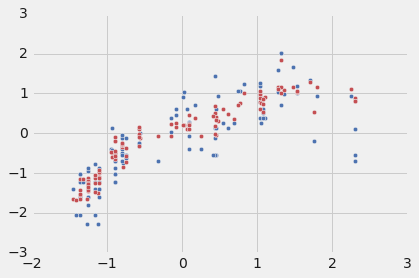

In [36]:
col = 0 # inv_displacement
plt.scatter(X_test_scaled[:, col], y_test_scaled);
plt.scatter(X_test_scaled[:, col], y_pred_scaled, c='r');

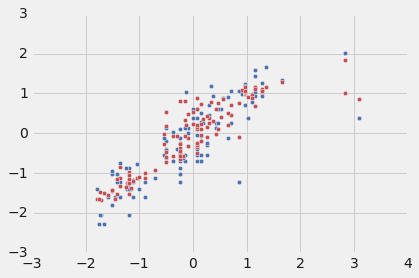

In [37]:

col = 1 # inv_horsepower
plt.scatter(X_test_scaled[:, col], y_test_scaled);
plt.scatter(X_test_scaled[:, col], y_pred_scaled, c='r');

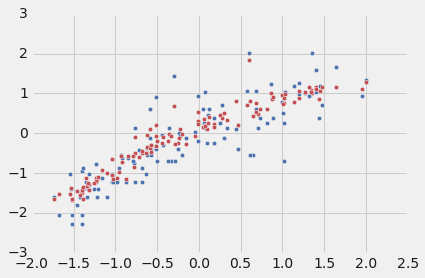

In [38]:
col = 2 # inv_weight
plt.scatter(X_test_scaled[:, col], y_test_scaled);
plt.scatter(X_test_scaled[:, col], y_pred_scaled, c='r');

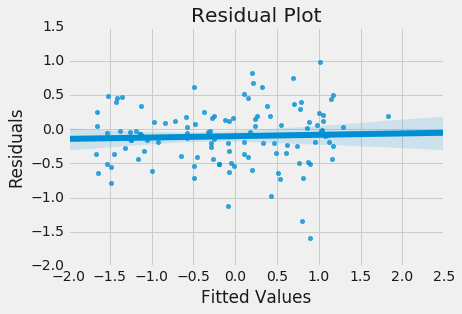

In [39]:

ax = sns.regplot(y_pred_scaled[:,0], y_test_scaled[:,0]-y_pred_scaled[:,0]);
ax.set(xlabel='Fitted Values', ylabel='Residuals', title='Residual Plot')
plt.show();

# 3. Gradient Boosting

In [41]:
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
gb_regressor.get_params()


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [43]:
y_predicted_gbr = gb_regressor.predict(X_test)
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
print(rmse_bgr)
print(gb_regressor.score(X_test,y_test))

0.2693017179182027
0.803903160062129


# 4.Random Forest

In [44]:
# make a copy of df instead of overwriting it
col_kept = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df3 = df1[col_kept].copy()
df3.head(8)

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5
5,15.0,429.0,198.0,4341.0,10.0
6,14.0,454.0,220.0,4354.0,9.0
7,14.0,440.0,215.0,4312.0,8.5


In [45]:
from sklearn.model_selection import train_test_split
training,test = train_test_split(df3, train_size = 0.7, test_size = 0.3,shuffle=True)
training, valid = train_test_split(training, train_size = 0.7, test_size =0.3,shuffle=True)
training_label = training.pop('mpg')
test_label = test.pop('mpg')
valid_label = valid.pop('mpg')

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(training, training_label) # train the models
rfc_predict = rfc.predict(test) #test the model


In [47]:
from sklearn.metrics import mean_squared_error
import math
accuracy = dict()
accuracy['RandomForest RMSE'] = math.sqrt(mean_squared_error(test_label,rfc_predict))
print(accuracy)
print("r^2=",rfc.score(test, test_label))

{'RandomForest RMSE': 3.6044182515634056}
r^2= 0.7892778357084884
